# Plotting Distribution of Demographic Information in DGC Migraine Study

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plot_functions.load_palette import load_palette
import data_processing.import_data as imp

In [3]:
palette = load_palette()
demog_df = imp.import_demographic_file()

In [4]:
from data_processing.load_env import load_env
env = load_env()
data_dict = pd.read_csv(env['data_dictionary_file'])
data_dict.head()

,Variable / Field Name,Form Name,Section Header,Field Type,Field Label,"Choices, Calculations, OR Slider Labels",Field Note,Text Validation Type OR Show Slider Number,Text Validation Min,Text Validation Max,Identifier?,Branching Logic (Show field only if...),Required Field?,Custom Alignment,Question Number (surveys only),Matrix Group Name,Matrix Ranking?,Field Annotation
0,record_id,contact_info_schedule,NaN,text,Study ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cont_project,contact_info_schedule,NaN,text,Project Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
2,presc_record_id,contact_info_schedule,NaN,text,Prescreen Record ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,presc_cont_group,contact_info_schedule,NaN,text,Migraine RT Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cont_first_name,contact_info_schedule,Contact Information,text,First name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN


## Viewing Education, Family Income, Race distributions, Age

In [5]:
edu_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_highest_education', 'Choices, Calculations, OR Slider Labels'])[0]
edu_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in edu_dict_str.split(' | ')
}
edu_dict
demog_df['demog_highest_education_str'] = demog_df['demog_highest_education'].map(edu_dict)

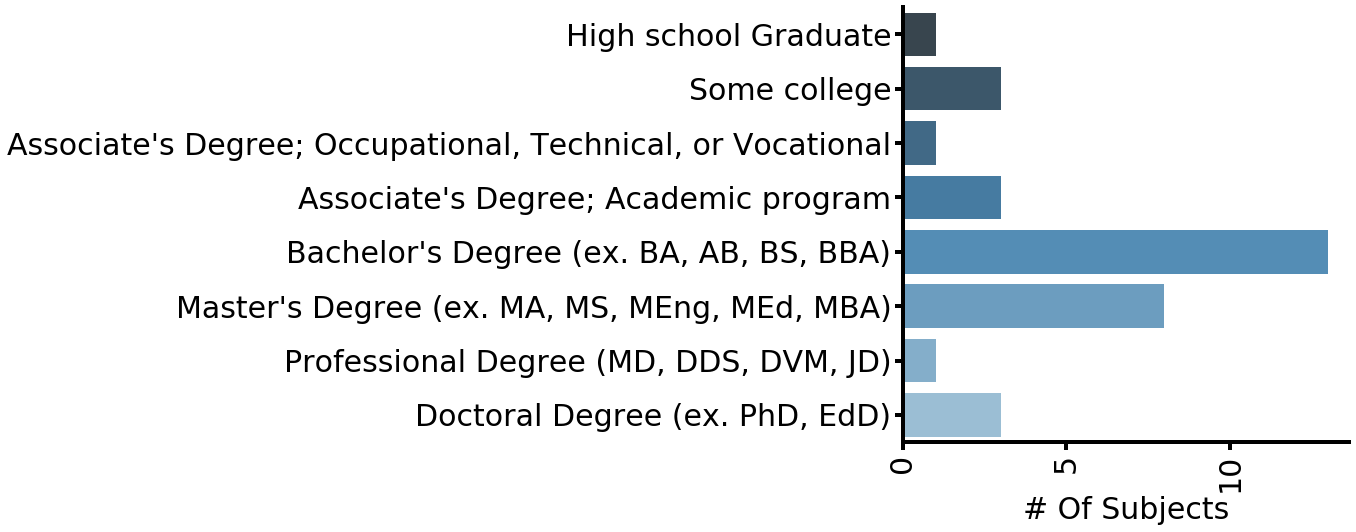

In [6]:
import plot_functions.format_axis as fmt
fig, ax = plt.subplots(figsize=(8, 8))
edu_df = demog_df[['demog_highest_education_str', 'demog_highest_education']].sort_values(by='demog_highest_education')
sns.countplot(
    y=edu_df['demog_highest_education_str'],
    ax=ax,
    palette='Blues_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=90,
)
sns.despine()
ax.tick_params(axis='x', rotation=90)

In [7]:
inc_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_fam_income', 'Choices, Calculations, OR Slider Labels'])[0]
inc_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in inc_dict_str.split(' | ')
}
demog_df['demog_fam_income_str'] = demog_df['demog_fam_income'].map(inc_dict)

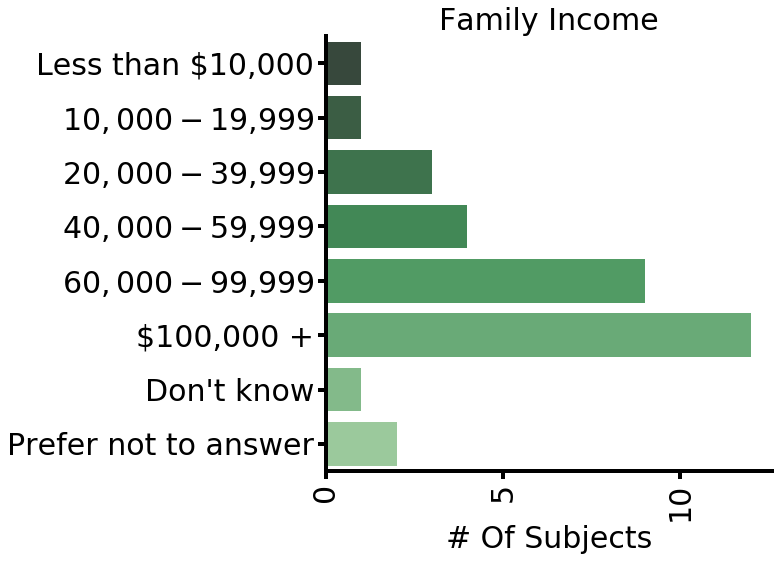

In [8]:
import plot_functions.format_axis as fmt

inc_df = demog_df[['demog_fam_income_str', 'demog_fam_income']].sort_values(by='demog_fam_income')

fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    y=inc_df['demog_fam_income_str'],
    ax=ax,
    #order=order,
    palette='Greens_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=90,
)
sns.despine()
ax.set_title('Family Income', fontsize=30)
ax.tick_params(axis='x', rotation=90)

In [9]:
race_dict_str = list(data_dict.loc[data_dict['Variable / Field Name'] == 'demog_race', 'Choices, Calculations, OR Slider Labels'])[0]
race_dict = {
    int(val.split(', ')[0]): ', '.join(val.split(', ')[1:])
    for val in race_dict_str.split(' | ')
}
demog_df['demog_race_str'] = demog_df['demog_race'].map(race_dict)

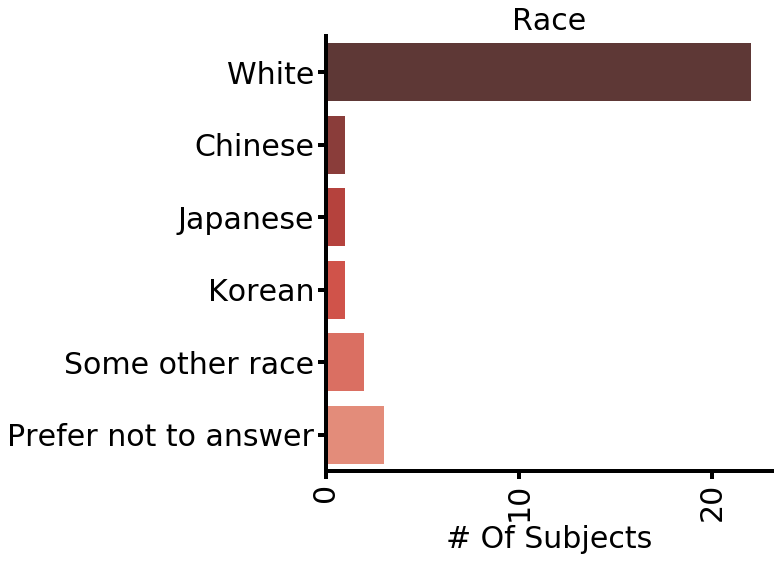

In [10]:
import plot_functions.format_axis as fmt

race_df = demog_df[['demog_race_str', 'demog_race']].sort_values(by='demog_race')

fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    y=race_df['demog_race_str'],
    ax=ax,
    #order=order,
    palette='Reds_d'
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=90,
)
sns.despine()
ax.set_title('Race', fontsize=30)
ax.tick_params(axis='x', rotation=90)

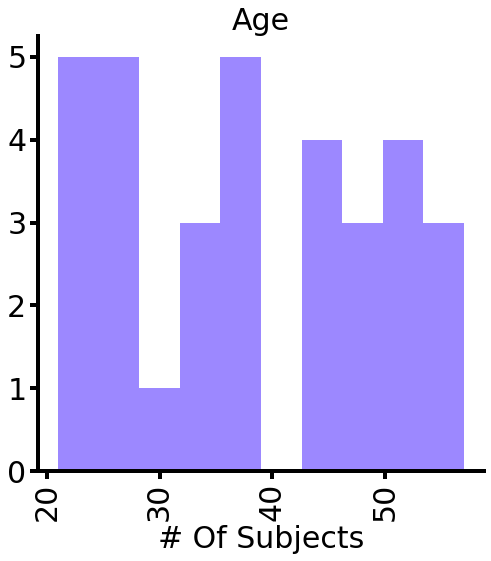

In [11]:
import plot_functions.format_axis as fmt


fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(
    demog_df['cont_age'],
    color=load_palette()['cont_age']
)
ax.set_xlabel('# Of Subjects', fontsize=20)
ax.set_ylabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_title('Age', fontsize=30)
ax.tick_params(axis='x', rotation=90)

## Sheehan Disability Scale at Baseline, Followup, and Change

/Users/akre96/Code/DGC_Study/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,sds_score,subject_id,time
0,NaN,m2_0001,Baseline
1,NaN,m2_0002,Baseline
2,NaN,m2_0003,Baseline
3,0.0,m2_0005,Baseline
4,10.0,m2_0006,Baseline


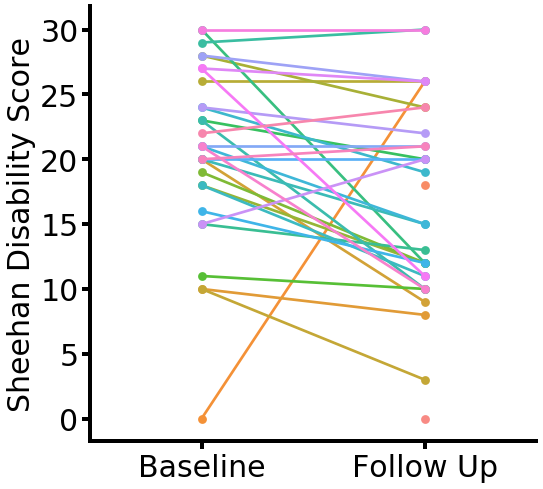

In [14]:
import plot_functions.format_axis as fmt
demog_df['sds_score_change'] =  demog_df['sds_score___pfa'] - demog_df['sds_score']
post = demog_df[['sds_score___pfa', 'subject_id']].rename(columns={'sds_score___pfa': 'sds_score'})
baseline = demog_df[['sds_score', 'subject_id']]

post['time'] = 'Follow Up'
baseline['time'] = 'Baseline'
order = ['Baseline', 'Follow Up']

_, ax = plt.subplots(figsize=(8,8))
sds_data = pd.concat([baseline, post])
sns.pointplot(
    x='time',
    y='sds_score',
    data=sds_data,
    hue='subject_id',
    order=order,
    ax=ax
)
ax.legend().remove()
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('Sheehan Disability Score')
sds_data.head()


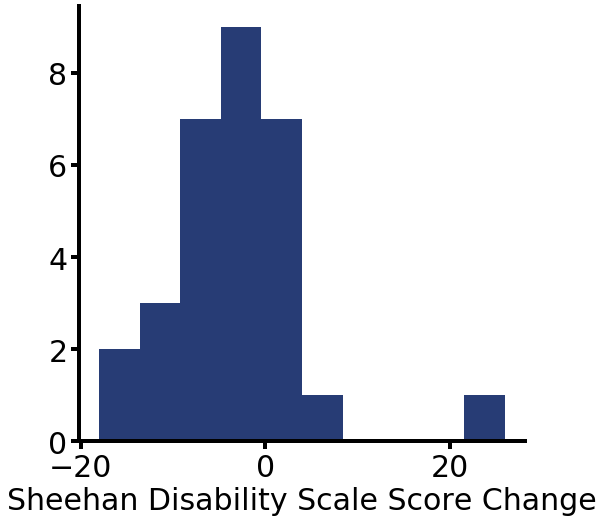

In [13]:
import plot_functions.format_axis as fmt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['sds_score_change'].dropna(),
    color=load_palette()['sds_score_bs'],
)

ax.set_xlabel('Sheehan Disability Scale Score Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)



## Hamilton Depression Scale at Baseline, Followup, and Change

/Users/akre96/Code/DGC_Study/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


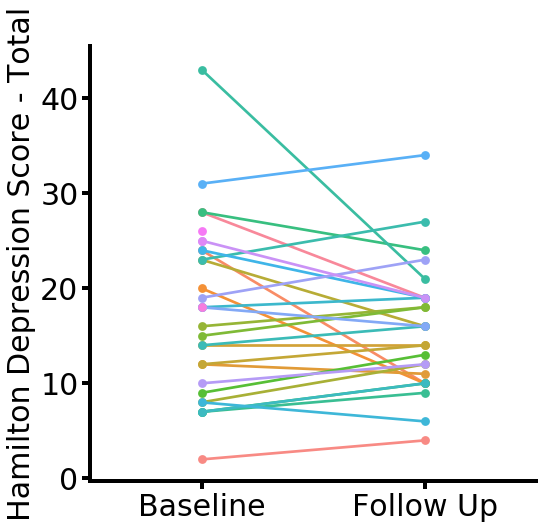

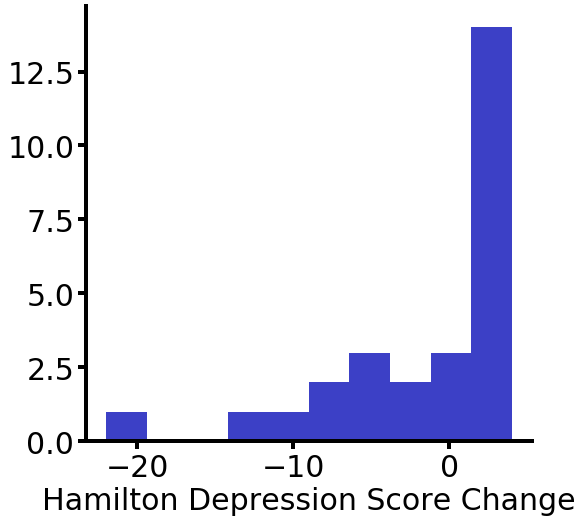

In [15]:
import plot_functions.format_axis as fmt
demog_df['hamd_total_change'] =  demog_df['hamd_total___fa'] - demog_df['hamd_total']
post = demog_df[['hamd_total___fa', 'subject_id']].rename(columns={'hamd_total___fa': 'hamd_total'})
baseline = demog_df[['hamd_total', 'subject_id']]

post['time'] = 'Follow Up'
baseline['time'] = 'Baseline'
order = ['Baseline', 'Follow Up']

_, ax = plt.subplots(figsize=(8,8))
sds_data = pd.concat([baseline, post])
sns.pointplot(
    x='time',
    y='hamd_total',
    data=sds_data,
    hue='subject_id',
    order=order,
    ax=ax
)
ax.legend().remove()
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=0,
)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('Hamilton Depression Score - Total')
sds_data.head()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['hamd_total_change'].dropna(),
    color=load_palette()['catmh_dep_severity_1'],
)

ax.set_xlabel('Hamilton Depression Score Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)

## Looking at correlation between CAT-MH and HAM-D Depression Assessments

Text(0.5, 1.0, 'r: 0.66 p: 0.0001')

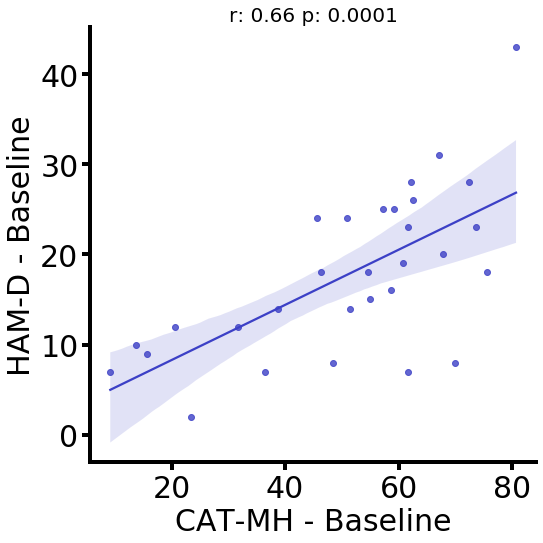

In [23]:
no_na_demog_df = demog_df[['catmh_dep_severity', 'hamd_total']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity'], no_na_demog_df['hamd_total'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity',
    y='hamd_total',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D - Baseline') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH - Baseline', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)

Text(0.5, 1.0, 'r: 0.4563 p: 0.0191')

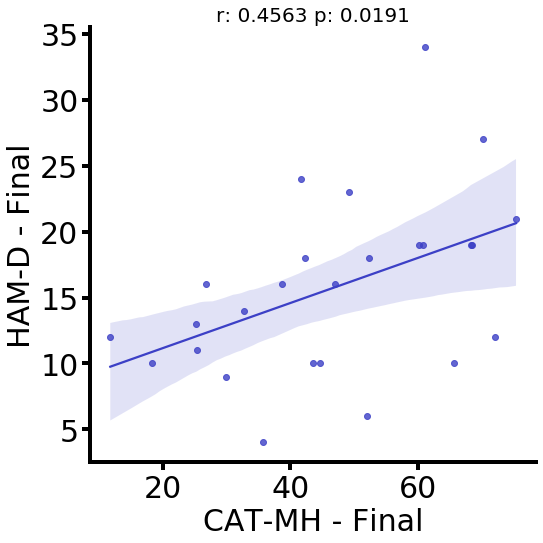

In [21]:
no_na_demog_df = demog_df[['catmh_dep_severity___fa', 'hamd_total___fa']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity___fa'], no_na_demog_df['hamd_total___fa'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity___fa',
    y='hamd_total___fa',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D - Final') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH - Final', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)